In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

import ot
from scipy.spatial.distance import cdist

from scipy.stats import multivariate_normal as mvn
from matplotlib import cm

In [2]:
# from sklearn.datasets import fetch_openml

# # Load MNIST dataset using scikit-learn
# mnist = fetch_openml('mnist_784')

# # Extract features and labels
# images, labels = mnist.data, mnist.target

# np.save("data_files//mnist_data.npy", np.array(images.values))
# np.save("data_files//mnist_labels.npy", np.array(labels.values))

In [3]:
data_folder = r'D:\MNIST-digits/'

images = np.load(data_folder+"mnist_data.npy")
labels = np.load(data_folder+"mnist_labels.npy", allow_pickle=True)

In [4]:
image_list = [image.reshape(28,28) for i, image in enumerate(images) if labels[i] =='5']

In [5]:
class measure():
    
    def __init__(self, weights, locations):
        self.weights = weights
        self.locations = locations
    
    #For images
    def imshow(self):
        plt.imshow(self.weights.reshape(28,28), cmap=cm.hot_r)
        
    #For point clouds
    def plot_barycenter(self):
        est = np.zeros((28,28))

        for i in range(28):
            for j in range(28):
                #Estimate measure on grid using Gaussian Kernels
                est[i,j] = np.sum(mvn.pdf(self.locations, mean=[i,j],cov=np.eye(2))*self.weights)
                
        plt.imshow(est, cmap=cm.hot_r)
        
        
        
def locations_update(barycenter, measure_list, Pi_list):
        
    return np.mean(np.array([measure_list[i].locations.T@Pi_list[i].T@np.diag(1/barycenter.weights.reshape(-1)) for i in range(len(measure_list))]),0).T

    
def free_support_barycenter_update(measure_list, barycenter=None, N=20):
    
    if barycenter==None:
        init_weights = np.ones((N,1))/N
        init_locations = np.zeros(3)+np.random.normal(size=(N,3))
        barycenter = measure(init_weights, init_locations)
        
    else:
    
        result_list = [wasserstein_type_distance(barycenter, measure) for measure in measure_list]
        Pi_list = [result[1][0] for result in result_list]
        alpha_list = [ot.lp.center_ot_dual(result[1][1]['u'],result[1][1]['v'])[0] for result in result_list]
        
        barycenter.means_ = means_update(barycenter, measure_list, Pi_list)
        barycenter.covariances_ = covariance_update(space, barycenter, measure_list, Pi_list)
        
        barycenter.weights_ = weights_update(barycenter, alpha_list)
    
    return barycenter


def weights_update(barycenter, alpha_list, lr=0.00005):
    
    #get subgradient
    alpha = np.mean(np.array(alpha_list),0)

    #calculate subgradient update
    a_star = barycenter.weights+(lr*alpha.reshape(1,-1))

    #project a_star into (interior of) probability simplex
    a_star[a_star<0]=0.000001
    a = a_star/np.sum(a_star)
    
    return a.reshape(-1)
        


In [48]:
D = np.zeros((2,28,28))
for i in range(28):
    for j in range(28):
        
        D[:,i,j] = np.array([i,j])
        
coords = D.reshape(2,28*28).T

M = np.square(cdist(coords,coords))     

In [7]:
measure_list = [measure((image/np.sum(image)).flatten(), coords) for image in image_list if np.sum(image)>0]

In [54]:
M0 = cdist(barycenter0.locations, coords)

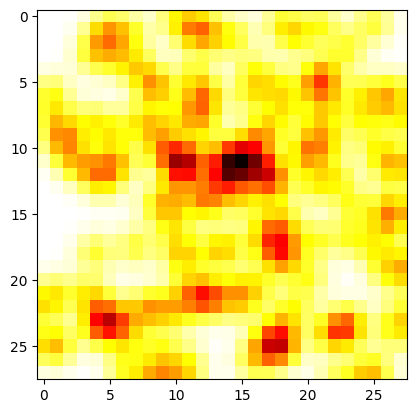

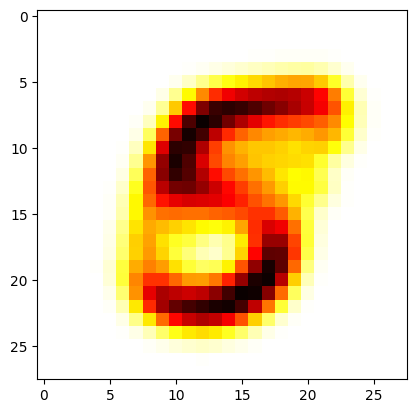

In [8]:
N=150
barycenter = measure(np.ones(N)/N, np.random.rand(N,2)*28)
#Plot initial barycenter
barycenter.plot_barycenter()

test = barycenter
M=np.square(cdist(test.locations,coords))
a=test.weights

for i in range(10):
    
    result_list = [(M,ot.emd(test.weights,measure.weights,M,log=True)) for measure in measure_list]
    Pi_list = [result[1][0] for result in result_list]
    alpha_list = [ot.lp.center_ot_dual(result[1][1]['u'],result[1][1]['v'])[0] for result in result_list]

    test.locations = locations_update(test, measure_list, Pi_list)   
    test.weights = weights_update(test, alpha_list)
    
    M=np.square(cdist(test.locations,coords))

    #plot 150 point barycenter after each updates
plt.figure()
test.plot_barycenter()
plt.show()
    
#for later plotting
barycenter0 = test
M0 = M

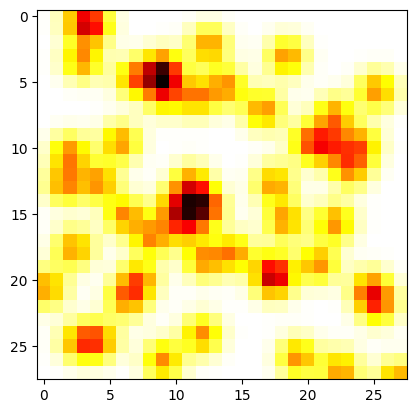

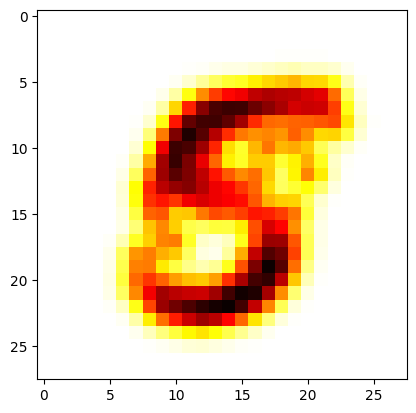

In [9]:
N=50
barycenter = measure(np.ones(N)/N, np.random.rand(N,2)*28)
#Plot initial barycenter
barycenter.plot_barycenter()

test = barycenter
M=cdist(test.locations,coords)
a=test.weights

for i in range(10):
    
    result_list = [(M,ot.emd(test.weights,measure.weights,M,log=True)) for measure in measure_list]
    Pi_list = [result[1][0] for result in result_list]
    alpha_list = [ot.lp.center_ot_dual(result[1][1]['u'],result[1][1]['v'])[0] for result in result_list]

    test.locations = locations_update(test, measure_list, Pi_list)   
    test.weights = weights_update(test, alpha_list)
    
    M=np.square(cdist(test.locations,coords))

#plot 50 point barycenter after 15 updates
plt.figure()
test.plot_barycenter()
plt.show()
    
#for later plotting
barycenter1 = test
M1 = M

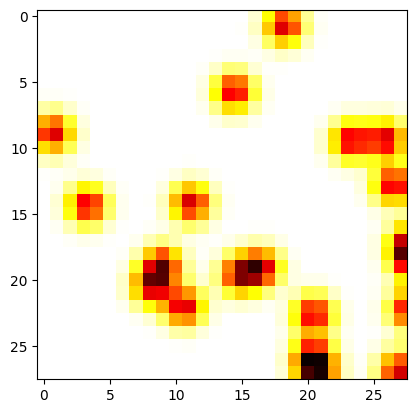

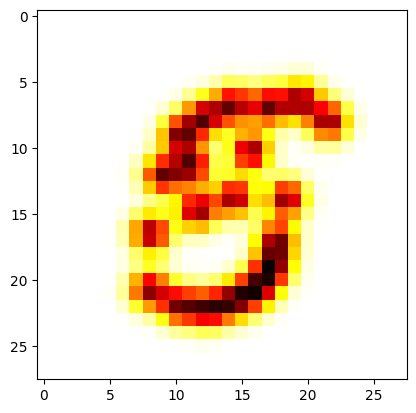

In [10]:
N=20
barycenter = measure(np.ones(N)/N, np.random.rand(N,2)*28)
#Plot initial barycenter
barycenter.plot_barycenter()

test = barycenter
M=cdist(test.locations,coords)
a=test.weights

for i in range(10):
    
    result_list = [(M,ot.emd(test.weights,measure.weights,M,log=True)) for measure in measure_list]
    Pi_list = [result[1][0] for result in result_list]
    alpha_list = [ot.lp.center_ot_dual(result[1][1]['u'],result[1][1]['v'])[0] for result in result_list]

    test.locations = locations_update(test, measure_list, Pi_list)   
    test.weights = weights_update(test, alpha_list)
    
    M=np.square(cdist(test.locations,coords))

#plot 20 point barycenter after 20 updates
plt.figure()
test.plot_barycenter()
plt.show()
    
#for later plotting
barycenter2 = test
M2 = M

In [102]:
A.shape

(784, 100)

In [103]:
B=A[np.mean(A,1)>0]

In [106]:
supports = coords[np.mean(A,1)>0]
M_star = cdist(supports,supports)

In [107]:
ind=np.where(np.mean(A,1)>0)

In [108]:
weights_recon = np.zeros(784)
weights_recon[ind]=a

ValueError: shape mismatch: value array of shape (596,) could not be broadcast to indexing result of shape (466,)

In [ ]:
plt.imshow(weights_recon.reshape(28,28))

In [109]:
B.shape

(466, 100)

In [110]:
M_star.shape

(466, 466)

In [101]:
A = np.array([measure.weights for measure in measure_list])[:100].T

In [71]:
A.shape

(784, 6313)

In [51]:
M0.shape

(784, 784)

In [111]:
a = ot.lp.barycenter(B,M_star)


KeyboardInterrupt



In [89]:
plt.imshow(a.reshape(28,28), cmap='hot_r')

ValueError: cannot reshape array of size 596 into shape (28,28)

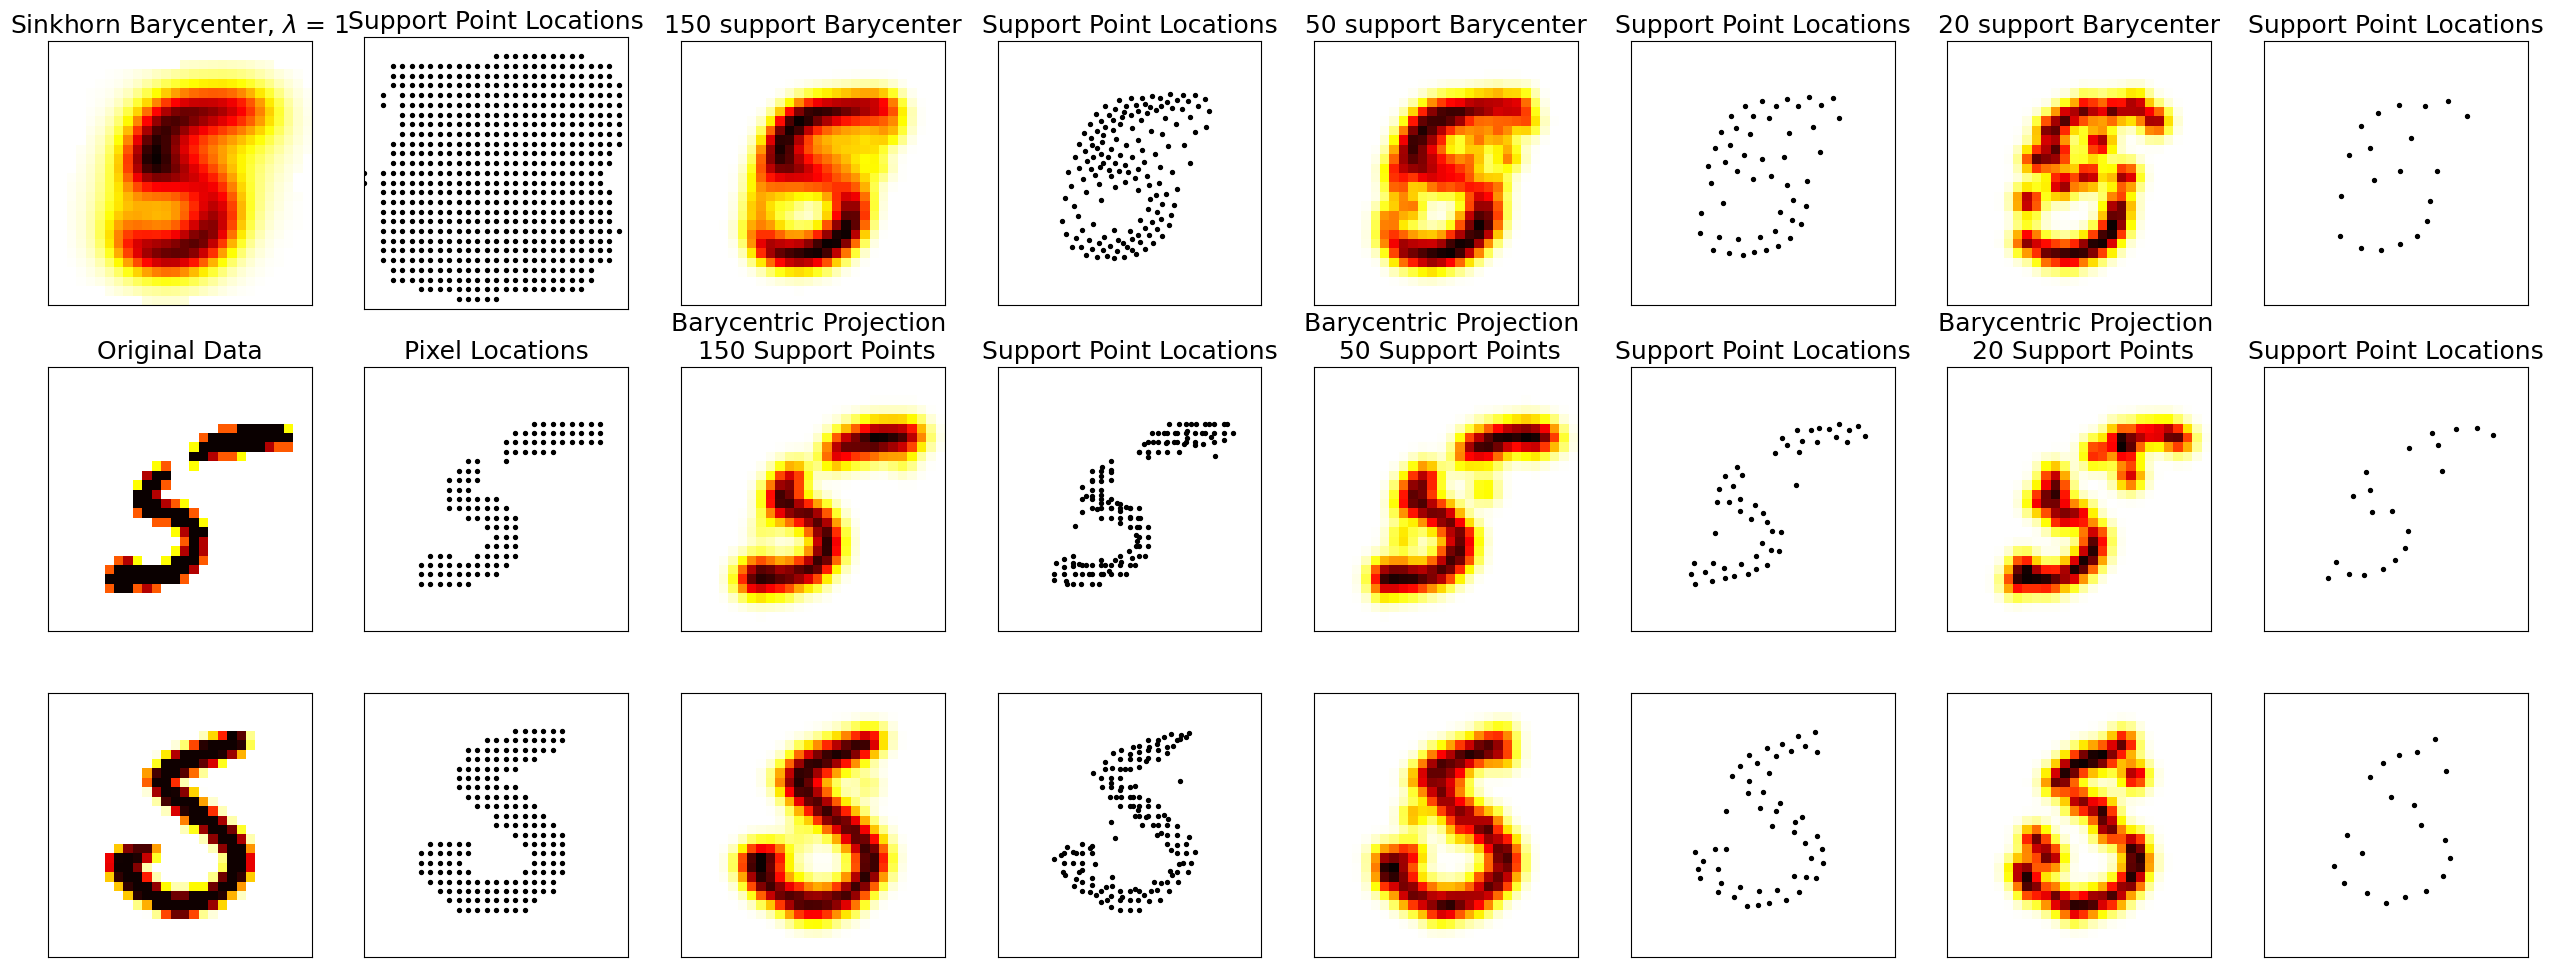

In [87]:
plt.figure(figsize = (32,12))

plt.subplot(3,8,1)
plt.imshow(weights_recon.reshape(28,28), cmap='hot_r')
plt.xticks([])
plt.yticks([])
plt.title("Sinkhorn Barycenter, $\lambda$ = 1", fontsize= 18)

plt.subplot(3,8,2)
plt.scatter(supports[:,1],-supports[:,0],c='black',s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.title("Support Point Locations", fontsize=18)

plt.subplot(3,8,3)
barycenter0.plot_barycenter()
plt.xticks([])
plt.yticks([])
plt.title("150 support Barycenter", fontsize=18)

plt.subplot(3,8,4)
plt.scatter(barycenter0.locations[:,1],-barycenter0.locations[:,0],c='black', s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.gca().set_aspect('equal')
plt.title("Support Point Locations", fontsize=18)


plt.subplot(3,8,5)
barycenter1.plot_barycenter()
plt.xticks([])
plt.yticks([])
plt.title("50 support Barycenter", fontsize=18)

plt.subplot(3,8,6)
plt.scatter(barycenter1.locations[:,1],-barycenter1.locations[:,0],c='black', s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.gca().set_aspect('equal')
plt.title("Support Point Locations", fontsize=18)



plt.subplot(3,8,7)
barycenter2.plot_barycenter()
plt.xticks([])
plt.yticks([])
plt.title("20 support Barycenter", fontsize=18)

plt.subplot(3,8,8)
plt.scatter(barycenter2.locations[:,1],-barycenter2.locations[:,0],c='black', s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.gca().set_aspect('equal')
plt.title("Support Point Locations", fontsize=18)


i = 3
test0 = measure_list[i]
plt.subplot(3,8,1+8)
test0.imshow()#.plot_barycenter()
plt.xticks([])
plt.yticks([])
plt.title("Original Data", fontsize=18)

plt.subplot(3,8,2+8)
plt.scatter(test0.locations[:,1][test0.weights>0],-test0.locations[:,0][test0.weights>0],c='black', s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.gca().set_aspect('equal')
plt.title("Pixel Locations", fontsize=18)

plt.subplot(3,8,3+8)
test = measure(barycenter0.weights, np.diag(1/barycenter0.weights)@ot.emd(barycenter0.weights, test0.weights, M0)@test0.locations)
test.plot_barycenter()
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Barycentric Projection \n 150 Support Points", fontsize=18)

plt.subplot(3,8,4+8)
plt.scatter(test.locations[:,1][test.weights>0],-test.locations[:,0][test.weights>0],c='black', s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.gca().set_aspect('equal')
plt.title("Support Point Locations", fontsize=18)

plt.subplot(3,8,5+8)
test = measure(barycenter1.weights, np.diag(1/barycenter1.weights)@ot.emd(barycenter1.weights, test0.weights, M1)@test0.locations)
test.plot_barycenter()
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Barycentric Projection \n 50 Support Points", fontsize=18)


plt.subplot(3,8,6+8)
plt.scatter(test.locations[:,1][test.weights>0],-test.locations[:,0][test.weights>0],c='black', s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.gca().set_aspect('equal')
plt.title("Support Point Locations", fontsize=18)

plt.subplot(3,8,7+8)
test = measure(barycenter2.weights, np.diag(1/barycenter2.weights)@ot.emd(barycenter2.weights, test0.weights, M2)@test0.locations)
test.plot_barycenter()
plt.xticks([])
plt.yticks([])
plt.gca().set_title("Barycentric Projection \n 20 Support Points", fontsize=18)


plt.subplot(3,8,8+8)
plt.scatter(test.locations[:,1][test.weights>0],-test.locations[:,0][test.weights>0],c='black', s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.gca().set_aspect('equal')
plt.title("Support Point Locations", fontsize=18)

# plt.savefig("MNIST_test.png",bbox_inches='tight')

i = 7

test0 = measure_list[i]
plt.subplot(3,8,1+16)
test0.imshow()#plot_barycenter()
plt.xticks([])
plt.yticks([])
# plt.title("Original Data", fontsize=18)

plt.subplot(3,8,2+16)
plt.scatter(test0.locations[:,1][test0.weights>0],-test0.locations[:,0][test0.weights>0],c='black', s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.gca().set_aspect('equal')


plt.subplot(3,8,3+16)
test = measure(barycenter0.weights, np.diag(1/barycenter0.weights)@ot.emd(barycenter0.weights, test0.weights, M0)@test0.locations)
test.plot_barycenter()
plt.xticks([])
plt.yticks([])
# plt.gca().set_title("Barycentric Projection \n 50 Support Points", fontsize=18)

plt.subplot(3,8,4+16)
plt.scatter(test.locations[:,1][test.weights>0],-test.locations[:,0][test.weights>0],c='black', s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.gca().set_aspect('equal')

# plt.title("Support Point Locations", fontsize=18)

plt.subplot(3,8,5+16)
test = measure(barycenter1.weights, np.diag(1/barycenter1.weights)@ot.emd(barycenter1.weights, test0.weights, M1)@test0.locations)
test.plot_barycenter()
plt.xticks([])
plt.yticks([])
# plt.gca().set_title("Barycentric Projection \n 20 Support Points", fontsize=18)


plt.subplot(3,8,6+16)
plt.scatter(test.locations[:,1][test.weights>0],-test.locations[:,0][test.weights>0],c='black', s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.gca().set_aspect('equal')
# plt.title("Support Point Locations", fontsize=18)

plt.subplot(3,8,7+16)
test = measure(barycenter2.weights, np.diag(1/barycenter2.weights)@ot.emd(barycenter2.weights, test0.weights, M2)@test0.locations)
test.plot_barycenter()
plt.xticks([])
plt.yticks([])
# plt.gca().set_title("Barycentric Projection \n 20 Support Points", fontsize=18)


plt.subplot(3,8,8+16)
plt.scatter(test.locations[:,1][test.weights>0],-test.locations[:,0][test.weights>0],c='black', s=8)
plt.xticks([])
plt.yticks([])
plt.xlim([0,28])
plt.ylim([-28,0])
plt.gca().set_aspect('equal')
# plt.title("Support Point Locations", fontsize=18)


plt.savefig("MNIST_reduction_2.png",bbox_inches='tight')

In [ ]:
# for i in range(50):


#     plt.figure(figsize = (28,4))

#     test0 = measure_list[i]
#     plt.subplot(1,7,1)
#     test0.imshow()
#     plt.xticks([])
#     plt.yticks([])
#     plt.title("Original Data", fontsize=18)

#     plt.subplot(1,7,2)
#     test = measure(barycenter0.weights, np.diag(1/barycenter0.weights)@ot.emd(barycenter0.weights, test0.weights, M0)@test0.locations)
#     test.plot_barycenter()
#     plt.xticks([])
#     plt.yticks([])
#     plt.gca().set_title("Barycentric Projection \n 150 Support Points", fontsize=18)

#     plt.subplot(1,7,3)
#     for i, location in enumerate(test.locations):
#         plt.plot(location[1],-location[0],'.',c='black')
#         plt.xlim([0,28])
#         plt.ylim([-28,0])
#     plt.gca().set_aspect('equal')
#     plt.xticks([])
#     plt.yticks([])
#     plt.title("Support Point Locations", fontsize=18)

#     plt.subplot(1,7,4)
#     test = measure(barycenter1.weights, np.diag(1/barycenter1.weights)@ot.emd(barycenter1.weights, test0.weights, M1)@test0.locations)
#     test.plot_barycenter()
#     plt.xticks([])
#     plt.yticks([])
#     plt.gca().set_title("Barycentric Projection \n 50 Support Points", fontsize=18)


#     plt.subplot(1,7,5)
#     for i, location in enumerate(test.locations):
#         plt.plot(location[1],-location[0],'.',c='black')
#         plt.xlim([0,28])
#         plt.ylim([-28,0])
#     plt.gca().set_aspect('equal')
#     plt.xticks([])
#     plt.yticks([])
#     plt.title("Support Point Locations", fontsize=18)

#     plt.subplot(1,7,6)
#     test = measure(barycenter2.weights, np.diag(1/barycenter2.weights)@ot.emd(barycenter2.weights, test0.weights, M2)@test0.locations)
#     test.plot_barycenter()
#     plt.xticks([])
#     plt.yticks([])
#     plt.gca().set_title("Barycentric Projection \n 20 Support Points", fontsize=18)


#     plt.subplot(1,7,7)
#     for i, location in enumerate(test.locations):
#         plt.plot(location[1],-location[0],'.',c='black')
#         plt.xlim([0,28])
#         plt.ylim([-28,0])
#     plt.gca().set_aspect('equal')
#     plt.xticks([])
#     plt.yticks([])
#     plt.title("Support Point Locations", fontsize=18)
    
#     plt.show()


In [ ]:
# def get_barycenter(test,measure_list):

#     for i in range(10):
        
#         M=cdist(test.locations,coords)

#         result_list = [(M,ot.emd(test.weights,measure.weights,M,log=True)) for measure in measure_list]
#         Pi_list = [result[1][0] for result in result_list]
#         alpha_list = [ot.lp.center_ot_dual(result[1][1]['u'],result[1][1]['v'])[0] for result in result_list]

#         test.locations = locations_update(test, measure_list, Pi_list)   
#         test.weights = weights_update(test, alpha_list)

       

#     return test

In [ ]:
# N= 20
# get_barycenter(measure(np.ones(N)/N, np.random.rand(N,2)*28), measure_list).plot_barycenter()

In [ ]:
# def get_kantorovitch_variance(barycenter, measure_list):

#     M = cdist(barycenter.locations, measure_list[0].locations)
#     return np.mean([ot.emd2(barycenter.weights, measure.weights, M) for measure in measure_list])

# def get_monge_variance(barycenter, measure_list):
#     dist = []
#     for measure in measure_list:
#         M = cdist(barycenter.locations, measure_list[0].locations)
#         M = cdist(barycenter.locations, np.diag(1/barycenter.weights)@ot.emd(barycenter.weights, measure.weights, M)@measure.locations)
#         dist.append(ot.emd2(barycenter.weights, barycenter.weights, M))
        
#     return np.mean(dist)

In [ ]:
# get_kantorovitch_variance(barycenter,measure_list)

In [ ]:
# get_monge_variance(barycenter,measure_list)

In [ ]:
# Monge_variance=[]
# Kantorovitch_variance=[]

# for N in range(20,160,10):
#     barycenter = get_barycenter(measure(np.ones(N)/N, np.random.rand(N,2)*28), measure_list)
    
#     Monge_variance.append(get_monge_variance(barycenter,measure_list))
#     Kantorovitch_variance.append(get_kantorovitch_variance(barycenter,measure_list))
          
#     plt.plot(np.array(Monge_variance))
#     plt.plot(np.array(Kantorovitch_variance)+np.array(Monge_variance))
#     plt.show()

In [ ]:
# plt.figure(figsize=(12,5))

# plt.subplot(1,2,1)
# plt.plot(range(20,160,10),np.array(Kantorovitch_variance))
# plt.plot(range(20,160,10),np.array(Monge_variance))
# plt.legend(["Wasserstein Variance",'Barycentric Projection Variance'])
# plt.xlabel("Number of Support Points")
# plt.title("Variance as a function of number of Support Points")

# plt.subplot(1,2,2)
# plt.plot(range(20,160,10),np.array(Monge_variance)/(np.array(Kantorovitch_variance)))
# plt.xlabel("Number of Support Points ")
# plt.title("Percent of Wasserstein Variance (w.r.t. Barycenter) \n Explained by Barycentric Projections")
# # plt.show()

# plt.savefig("Variance.png")

In [ ]:
# plt.plot(range(20,160,10),np.array(Monge_variance)/(np.array(Kantorovitch_variance)))